# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


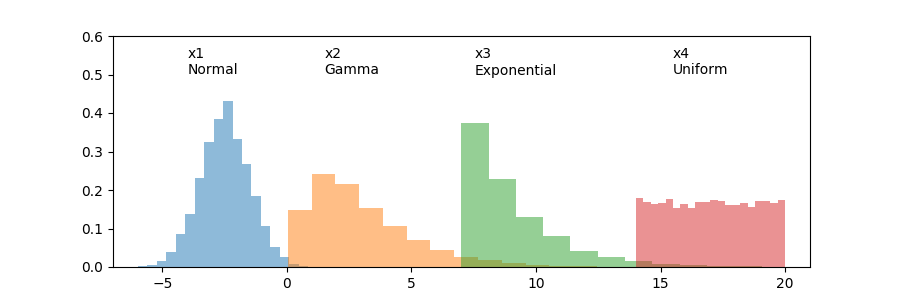

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import sys

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

axs = [x1,x2,x3,x4]
Legend = [ 'x1\nNormal', 'x2\nGamma','x3\nExponential','x4\nUniform']

plt.figure(figsize=(9,3))
plt.axis([-7,21,0,0.6])

for type in range(0,len(axs)):
    plt.hist(axs[type], normed=True, bins=20, alpha=0.5)#plot histagram
    plt.text(axs[type].mean()-1.5, 0.5, Legend[type])#plot legend

<IPython.core.display.Javascript object>


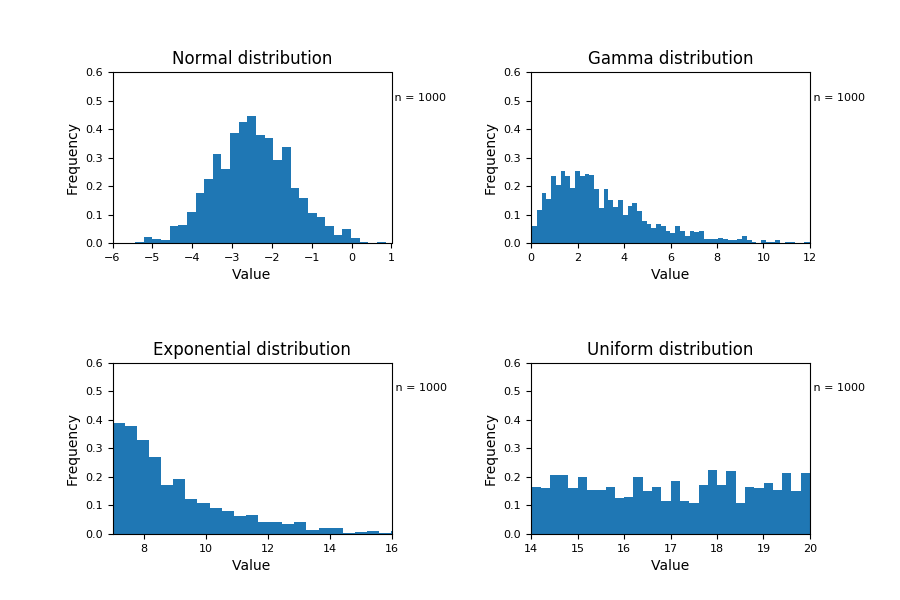

In [10]:
fig, ((sp1,sp2), (sp3,sp4)) = plt.subplots(2,2, sharey = True,figsize=(9,6))
subplots = [sp1,sp2,sp3,sp4]
distributions = [x1,x2,x3,x4]
axis = [[-6,1,0,0.6],[0,12,0,0.6],[7,16,0,0.6],[14,20,0,0.6]]
binheight = 0.1
binlist = [len(np.arange(b[0],b[1],binheight)) for b in axis]
n= 1000

In [11]:
def update(curr):    
    curr = curr*50
    if curr >= n:
        a.event_source.stop()   
    for i in range(0,len(subplots)):
        
        subplots[i].cla()
        subplots[i].axis(axis[i])    
        subplots[i].hist(distributions[i][:curr], normed = True, bins = binlist[i]/2)          
        subplots[i].set_title('{}'.format(Legend[i][2:]+' distribution'), fontsize = 12)
        subplots[i].annotate(' n = {}'.format(curr), [axis[i][1], 0.5], fontsize = 8)
        subplots[i].set_ylabel('Frequency', fontsize = 10)
        subplots[i].set_xlabel('Value', fontsize = 10)
        subplots[i].xaxis.set_tick_params(labelsize=8)
        subplots[i].yaxis.set_tick_params(labelsize=8)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.5, hspace=0.7) 

#mpl.use('Agg')
#mpl.rcParams['animation.ffmpeg_path'] = "C:\Program Files\ImageMagick-6.9.9-Q8\ffmpeg.exe"
# For Imagemagick 7.0, convert.exe is replaced by magick.exe
#mpl.rcParams['animation.convert_path'] = "C:\Program Files\ImageMagick-6.9.9-Q8\magick.exe"  #/  
    
a = animation.FuncAnimation(fig, update, interval=100, blit=True) 

#a.save('Aanimation.mp4', writer='imagemagick', fps=4)
#a

#"C:\Program Files\ImageMagick-6.9.9-Q8"

In [12]:
a.save('Aanimation.mp4', dpi=100)
from IPython.display import HTML
link = '<a href="{0}" >Click here to download {0}</a>'
HTML(link.format('Aanimation.mp4'))

/opt/conda/lib/python3.5/site-packages/matplotlib/animation.py:971: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)
/opt/conda/lib/python3.5/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/opt/conda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6198: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()
/opt/conda/lib/python3.5/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)
